In [1152]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing all of the modules.

In [1153]:
df=pd.read_csv(r"C:\Users\Dell\Documents\Loan_default.csv")

Reading in the csv file as a data frame.

In [1154]:
df

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


Taking a look at the data.

In [1155]:
df.drop_duplicates(['LoanID'])

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


I dropped any duplicates of the LoanID column because is it a unique identifier. This would make any duplicates in this specific column a true duplicate instead of just possibly a repeated value, thus dropping duplicates from my unique column values would apply to the dataframe as a whole.

In [1156]:
print(df.isnull().sum())

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64


In [1157]:
df = df.drop(columns=['LoanPurpose','LoanID'])

Listing a sum of the null values per column for any necessary data cleaning.

In [1158]:
df['Education'].unique()

array(["Bachelor's", "Master's", 'High School', 'PhD'], dtype=object)

Looking at the unique values to encode.

In [1159]:
df['Education']=df['Education'].map({"Bachelor's": 0, "Master's": 1, 'High School': 2, 'PhD': 3})
df['Education']

0         0
1         1
2         1
3         2
4         0
         ..
255342    0
255343    2
255344    2
255345    2
255346    0
Name: Education, Length: 255347, dtype: int64

Encoding the unique values for the model.

In [1160]:
df['EmploymentType'].unique()

array(['Full-time', 'Unemployed', 'Self-employed', 'Part-time'],
      dtype=object)

Looking at the unique values to encode.

In [1161]:
df['EmploymentType']=df['EmploymentType'].map({'Full-time': 0, 'Unemployed': 1, 'Self-employed': 2, 'Part-time': 3})
df['EmploymentType']

0         0
1         0
2         1
3         0
4         1
         ..
255342    0
255343    3
255344    2
255345    3
255346    1
Name: EmploymentType, Length: 255347, dtype: int64

Encoding the unique values for the model.

In [1162]:
df['MaritalStatus'].unique()

array(['Divorced', 'Married', 'Single'], dtype=object)

Looking at the unique values to encode.

In [1163]:
df['MaritalStatus']=df['MaritalStatus'].map({'Divorced':0, 'Married':1, 'Single':2})
df['MaritalStatus']

0         0
1         1
2         0
3         1
4         0
         ..
255342    1
255343    0
255344    1
255345    2
255346    0
Name: MaritalStatus, Length: 255347, dtype: int64

Encoding the unique values for the model.

In [1164]:
df['HasMortgage'] =df['HasMortgage'].map({'Yes': 0, 'No': 1})
df['HasMortgage']

0         0
1         1
2         0
3         1
4         1
         ..
255342    1
255343    1
255344    0
255345    0
255346    0
Name: HasMortgage, Length: 255347, dtype: int64

Encoding the unique values for the model, this is yes or no which is easier to emcode and no need for a look at the unique values.

In [1165]:
df['HasDependents'] =df['HasDependents'].map({'Yes': 0, 'No': 1})
df['HasDependents']

0         0
1         1
2         0
3         1
4         0
         ..
255342    1
255343    1
255344    0
255345    0
255346    1
Name: HasDependents, Length: 255347, dtype: int64

Encoding the unique values for the model, this is yes or no which is easier to emcode and no need for a look at the unique values.

In [1166]:
df['HasCoSigner'] =df['HasCoSigner'].map({'Yes': 0, 'No': 1})
df['HasCoSigner']

0         0
1         0
2         1
3         1
4         1
         ..
255342    1
255343    1
255344    0
255345    1
255346    0
Name: HasCoSigner, Length: 255347, dtype: int64

Encoding the unique values for the model, this is yes or no which is easier to emcode and no need for a look at the unique values.

In [1167]:
df

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,0,0,0,0,0,0,0
1,69,50432,124440,458,15,1,4.81,60,0.68,1,0,1,1,1,0,0
2,46,84208,129188,451,26,3,21.17,24,0.31,1,1,0,0,0,1,1
3,32,31713,44799,743,0,3,7.07,24,0.23,2,0,1,1,1,1,0
4,60,20437,9139,633,8,4,6.51,48,0.73,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,0,0,1,1,1,1,0
255343,32,51953,189899,511,14,2,11.55,24,0.21,2,3,0,1,1,1,1
255344,56,84820,208294,597,70,3,5.29,60,0.50,2,2,1,0,0,0,0
255345,42,85109,60575,809,40,1,20.90,48,0.44,2,3,2,0,0,1,0


Looking at the encoded dataframe.

In [1168]:
X=df.iloc[:,0:15]

Choosing the columns from the dataframe for the X this would be index 0 to index 15, these will be the model features.

In [1169]:
y=df.iloc[:, [15]]

Choosing the column of 'Default' for y, this is the target variable and the default risk question I would like to answer with predictions.

In [1170]:
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=12, test_size=.2)

Train test splitting the model I added a random state and used the standard 20% test size.

In [1171]:
X_train.shape

(204277, 15)

Looking at the shape of my testing features.

In [1172]:
y_train.shape

(204277, 1)

Looking at the shape of my y training split, this is the Default column for training the model. 

In [1173]:
y_test.shape

(51070, 1)

Looking at the shape of my y testing split.

In [1174]:
X_test.shape

(51070, 15)

Looking at the shape of my testing features.

In [1175]:
dtc= DecisionTreeClassifier()

Creating the first version of my decision tree classifier with no hyper parameters.

In [1176]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

Fitting the first version of my decision tree model.

In [1177]:
y_pred=dtc.predict(X_test)

Making the first predictions from the first model.

In [1178]:
cf= confusion_matrix(y_test, y_pred)
print(cf)

[[39466  5615]
 [ 4623  1366]]


Looking at my confusion matrix numbers, true and false positives and negatives.

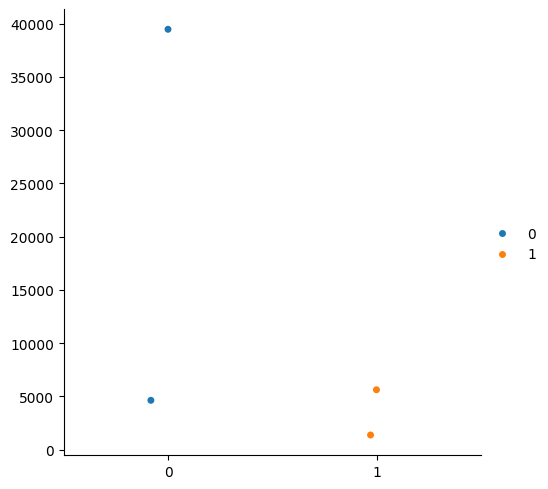

In [1179]:

fig=sns.catplot(data=cf, legend=True)

Visualizing my confusion matrix numbers, I can see the spread better.

In [1180]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89     45081
           1       0.20      0.23      0.21      5989

    accuracy                           0.80     51070
   macro avg       0.55      0.55      0.55     51070
weighted avg       0.81      0.80      0.81     51070



Printing a classification report for the first model, the accuracy is not great and the weighted averages are low too, this is indicating to me the model is performing poorly. This is more on the defaulted values, the binary indicator is 1 being defaulted and 0 not defaulted.

In [1181]:
dtc.feature_importances_

array([0.0899468 , 0.14618465, 0.13404518, 0.11376334, 0.09608961,
       0.02878235, 0.13652426, 0.03668616, 0.0938744 , 0.03235779,
       0.02976909, 0.02329437, 0.0139462 , 0.01379106, 0.01094475])

This is calling my array of feature importances, this provides an indication of the strength of each feature in the X variable. I will use this to make decisions on which columns to keep in the dataframe for the next version of the decision tree and then the random forest.

In [1182]:
features1=pd.DataFrame(dtc.feature_importances_, index=X.columns)
features1= features1.rename(columns={0:'Feature Importances'})
features1

,Feature Importances
Age,0.089947
Income,0.146185
LoanAmount,0.134045
CreditScore,0.113763
MonthsEmployed,0.096090
NumCreditLines,0.028782
InterestRate,0.136524
LoanTerm,0.036686
DTIRatio,0.093874
Education,0.032358


I took my feature importances and converted them into a pandas dataframe then renamed the column to make it easier to refer to. I will use this dataframe to make a visualization to further analyze the weight of each feature. I will then decide which columns to keep based on the importance and relevance of each, without removing too much. This indicates that having a cosigner in this model is the lowest.

<Axes: >

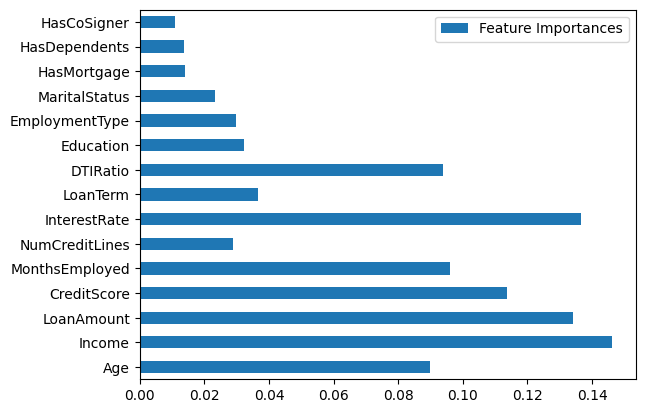

In [1183]:
features1.plot.barh()


I made a simple visualization of each of the feature importances, this is much more effective at presenting which features hold more importance. The top indicators for the model are:
#1 Income
#2 Interest Rate
#3 Loan Amount
#4 Credit Score
These are all quite realistic factors.

In [1184]:
dtc2=DecisionTreeClassifier(criterion='entropy', ccp_alpha=.01, random_state=42)

I will try another decision tree model with a few hyper parameter changes to try and improve the performance of the decision tree. I chose entropy because it is not default and random state because it allows for model reusability.

In [1185]:
dtc2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', random_state=42)

Fitting a second version of the decision tree.

In [1186]:
y_pred2=dtc2.predict(X_test)

Making a second prediction variable to use from my second version of the decision tree model.

[Text(0.5, 0.75, 'x[0] <= 38.5\nentropy = 0.517\nsamples = 204277\nvalue = [180613, 23664]'),
 Text(0.25, 0.25, 'entropy = 0.667\nsamples = 82567\nvalue = [68191.0, 14376.0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'entropy = 0.389\nsamples = 121710\nvalue = [112422, 9288]'),
 Text(0.625, 0.5, '  False')]

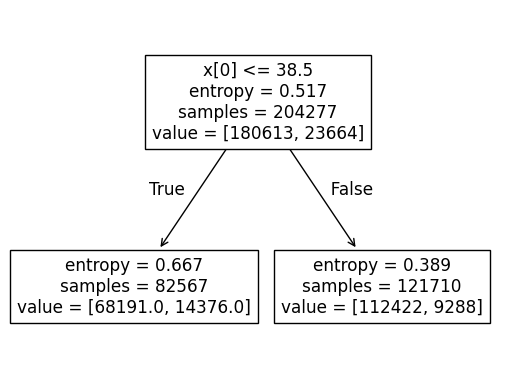

In [1187]:
tree.plot_tree(dtc2)

I visualized the decision tree to make it easier to understand what is happening with the splitting.

In [1188]:
cf2= confusion_matrix(y_test, y_pred2)
print(cf2)

[[45081     0]
 [ 5989     0]]


I decided to use a confusion matrix again to see how the model is doing. The indication is that there are no false negative predictions and also no true negatives.

<Axes: >

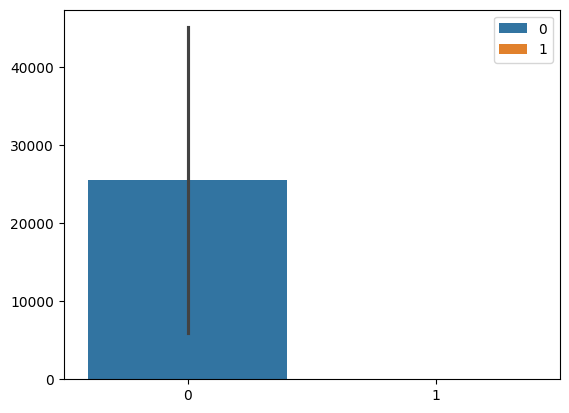

In [1189]:
sns.barplot(cf2, legend=True)

Visualizing the 4 points on a graph, there are no numbers for the defaulted values.

In [1190]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     45081
           1       0.00      0.00      0.00      5989

    accuracy                           0.88     51070
   macro avg       0.44      0.50      0.47     51070
weighted avg       0.78      0.88      0.83     51070



C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.

This model is performing better at 88 percent accuracy yet there is an issue with the defaulted class, I will now move into a random forest which is a better model.

In [1191]:
df2=df.drop(columns=['HasCoSigner','HasDependents','HasMortgage'])
df2

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,0,0,0,0
1,69,50432,124440,458,15,1,4.81,60,0.68,1,0,1,0
2,46,84208,129188,451,26,3,21.17,24,0.31,1,1,0,1
3,32,31713,44799,743,0,3,7.07,24,0.23,2,0,1,0
4,60,20437,9139,633,8,4,6.51,48,0.73,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,0,0,1,0
255343,32,51953,189899,511,14,2,11.55,24,0.21,2,3,0,1
255344,56,84820,208294,597,70,3,5.29,60,0.50,2,2,1,0
255345,42,85109,60575,809,40,1,20.90,48,0.44,2,3,2,0


I looked at the feature importance graph and took the lowest three features out of the model to attempt to make the model more accurate.

In [1192]:
X2=df2.iloc[:,0:11]

Creating my second X variable for training and testing purposes.

In [1193]:
y2=df2.iloc[:,[12]]

Creating my second y variable for training and testing purposes.

In [1194]:
X_train2, X_test2, y_train2, y_test2=train_test_split(X2, y2, random_state=42, test_size=.3)

This is the second train/test split of the data for the random forest model. I am using a 30 percent split which is a little above industry standard.

In [1195]:
X_test2.shape

(76605, 11)

Taking a look at the test shape for X.

In [1196]:
y_test2.shape

(76605, 1)

Taking a look at the test shape for y.

In [1197]:
rf1=RandomForestClassifier(max_depth=7)

Creating a random forest classifierto see how it performs against the decision tree, I had to add max depth due to the model taking a very long time to fit and plot.

In [1198]:
rf1.fit(X_train2, np.ravel(y_train2))

RandomForestClassifier(max_depth=7)

Fitting the first version of the random forest with the new variables for X and y so that I can keep track and keep the two model types seperated.

In [1199]:
y_pred3=rf1.predict(X_test2)

Making the predictions for the random forest model.

In [1200]:
rf1.score(X_test2,y_test2)

0.8839370798250767

Checking the overall score of the model. I see in the high 80 percent range which is much better than the decision tree. I prefer this metric to the confusion matrix with a random forest.

In [1201]:
print(classification_report(y_test2, y_pred3))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     67681
           1       0.76      0.01      0.01      8924

    accuracy                           0.88     76605
   macro avg       0.82      0.50      0.47     76605
weighted avg       0.87      0.88      0.83     76605



Taking a look at the classification report and the accuracy is in the high 80 percentile which is an improvement but it looks like the model is still struggling to predict defaulted status. I will see what I can do to help this with hyper parameters.

In [1202]:
rf1.feature_importances_

array([0.31636598, 0.21432198, 0.12310501, 0.01904647, 0.10416423,
       0.00444354, 0.19285112, 0.00179197, 0.00899417, 0.00274229,
       0.01217322])

In [1203]:
features2=pd.DataFrame(rf1.feature_importances_, index=X2.columns)
features2= features2.rename(columns={0:'Feature Importances'})
features2

,Feature Importances
Age,0.316366
Income,0.214322
LoanAmount,0.123105
CreditScore,0.019046
MonthsEmployed,0.104164
NumCreditLines,0.004444
InterestRate,0.192851
LoanTerm,0.001792
DTIRatio,0.008994
Education,0.002742


Created a dataframe of feature importances again but this time for the random forest model.

<Axes: >

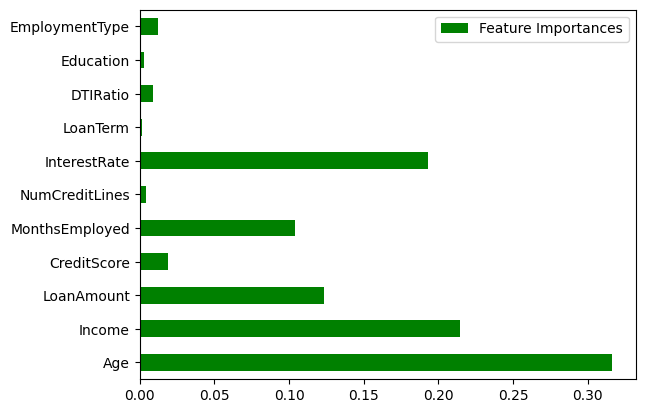

In [1204]:
features2.plot.barh(color='green')

This is a much easier way to see, this graph indicates that number of credit lines is the least while age and income reign supreme with loan intrest rate a close third. This is realistic, income and interest rate are two very obvious factors in default risk. If the income cannot keep up with the interest the debtor falls behind on payments and defaults. The age is more of a surprise factor, we must have some specific ages of debtors with defaults that are causing this to be more of a factor.

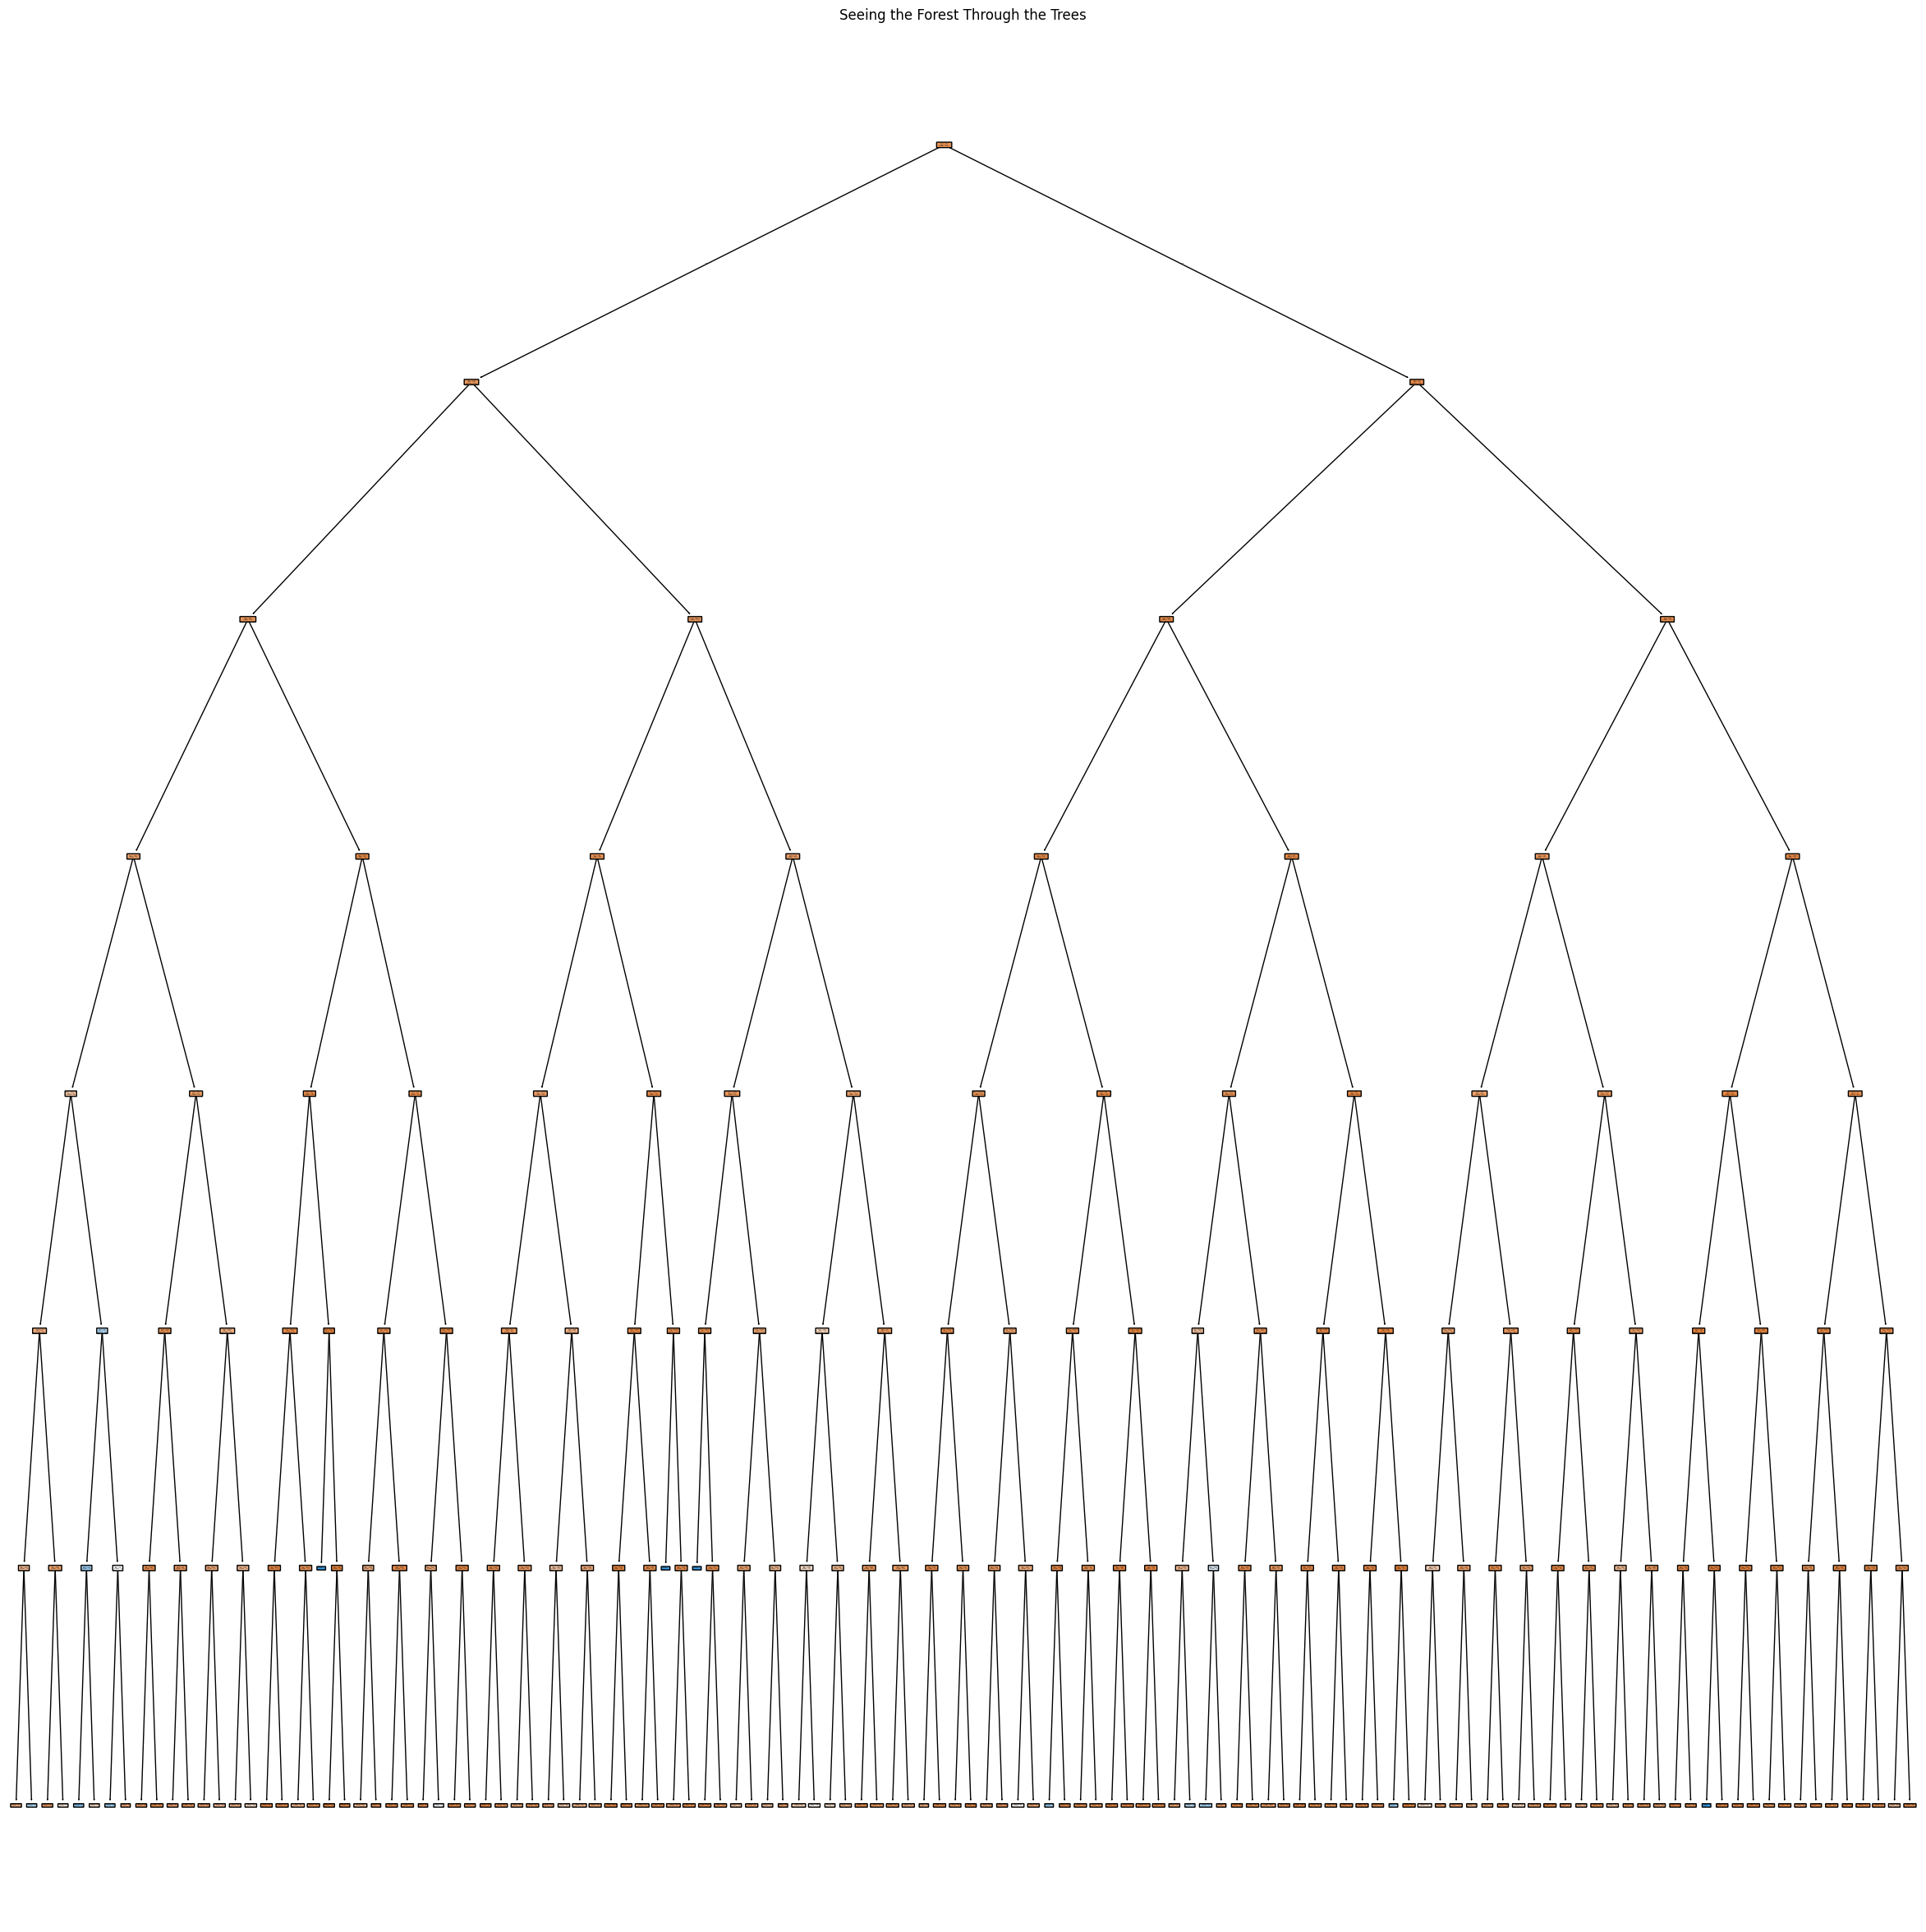

In [1205]:
# Plot the tree using the plot_tree function from sklearn
plt.figure(figsize=(30,30))  # Set figure size to make the tree more readable
plot_tree(rf1.estimators_[0], filled=True, rounded=True)
plt.title("Seeing the Forest Through the Trees")
plt.show()

WOW! I attempted to get this to fit so it could be read easier but all of the numbers I tried would not get it readable. This is a staggering amount of information and calculations. This type of visual will not be helpful in this case due to the vast amount of data, I will leave this in to show you my attempt and discovery of impracticality.

In [1206]:
rf2=RandomForestClassifier(n_estimators=1000, max_depth=8, warm_start=True, max_samples=1000, class_weight={0:3, 1:1, 2:2, 3:4, 4:9, 5:6, 6:5, 7:8, 8:7, 9:0, 10:10})

Creating the final random forest with hyper parameter tuning. With the code here I have added a max depth to keep the model from getting out of hand, I found a little trick to speed up the processing time called warm start. I added this because it was taking 5 minutes to compute everything. I added a max samples parameter to keep the forest from becoming too large. I have added class weight and customized each individual class weight with a dictionary, my features were unbalanced in the previous random forest and I wanted to adjust the feature relevance of the model by giving each class a custom weight until I had the model I was comfortable with presenting.

In [1207]:
rf2.fit(X_train2, np.ravel(y_train2))

RandomForestClassifier(class_weight={0: 3, 1: 1, 2: 2, 3: 4, 4: 9, 5: 6, 6: 5,
                                     7: 8, 8: 7, 9: 0, 10: 10},
                       max_depth=8, max_samples=1000, n_estimators=1000,
                       warm_start=True)

Fitting the final random forest model.

In [1208]:
y_pred4=rf2.predict(X_test2)

Making the final predictions.

In [1209]:
rf2.score(X_test2, y_test2)

0.8836760002610796

Checking the score of the model, I do not see improvement other than the feature importance.

In [1210]:
clsr=classification_report(y_test2, y_pred4)
print(clsr)

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     67681
           1       0.64      0.00      0.01      8924

    accuracy                           0.88     76605
   macro avg       0.76      0.50      0.47     76605
weighted avg       0.86      0.88      0.83     76605



The classification report tells me that this model can accurately predict a liklihood of a person not defaulting on the loan which is a good risk assesment tool. f1 score of 94% for the non-default class is significant.

In [1211]:
rf2.feature_importances_

array([0.11102484, 0.17282515, 0.13701452, 0.10983358, 0.10562491,
       0.03075523, 0.1498768 , 0.03444409, 0.09118835, 0.02746987,
       0.02994266])

Taking a look at the array of the feature importances for the final model.

In [1212]:
features3=pd.DataFrame(rf2.feature_importances_, index=X2.columns)
features3= features3.rename(columns={0:'Feature Importances'})
features3

,Feature Importances
Age,0.111025
Income,0.172825
LoanAmount,0.137015
CreditScore,0.109834
MonthsEmployed,0.105625
NumCreditLines,0.030755
InterestRate,0.149877
LoanTerm,0.034444
DTIRatio,0.091188
Education,0.027470


Creating the dataframe for the feature importances to be visualized better.

<Axes: >

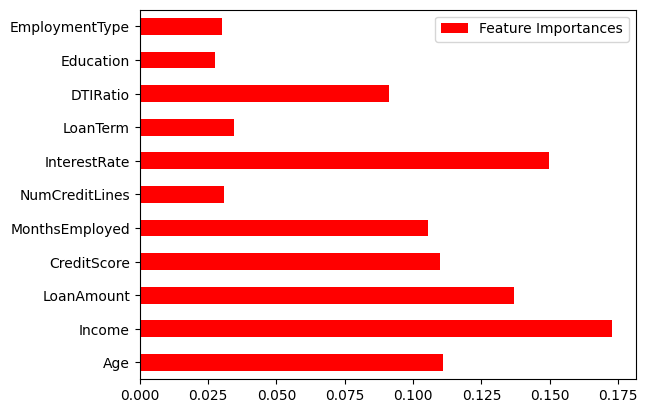

In [1227]:
features3.plot.barh(color='red')

Visualizing the feature importances to see the more balanced distribution. As you can see the classes are more balanced than they were in the previous model. I am comfortable bringing this model to production for the prediction of non default. I see income being the reigning factor and interest rate being the close second, these both are of primary importance in a loan risk. The 3rd is loan amount which is tied to both interest rate and credit score which comes in 4th. I like the realistic view of this model as it uses the four more relevant factors and boosts debt to income ratio as compared with the previous random forest model.

That is the completion of the model, I hope this was enjoyable.